# Exercise 3 - A
A manufacturer is testing a new type of battery, and the battery can either last 0 hours (it fails right away) or 4 hours (full charge). The company has a set of prototype batteries, and they want to understand the probability of a battery lasting 0 or 4 hours based on the average lifetime of the battery.

If the mean lifetime mu is close to 0, it indicates that most batteries fail quickly, so the probability  P(X = 0)  will be high, and  P(X = 4)  will be low.
If the mean lifetime mu is close to 4, it indicates that most batteries last a full 4 hours, so  P(X = 0)  will be low, and  P(X = 4)  will be high.
When mu = 2  hours, you would expect a more balanced distribution between the two outcomes.


/var/folders/k6/brsrwzpj17gb0p74g9g4qzlc0000gn/T/ipykernel_8364/3056873507.py:12: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  beta_solution = fsolve(equation, beta_initial_guess)[0]
/var/folders/k6/brsrwzpj17gb0p74g9g4qzlc0000gn/T/ipykernel_8364/3056873507.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  beta_solution = fsolve(equation, beta_initial_guess)[0]


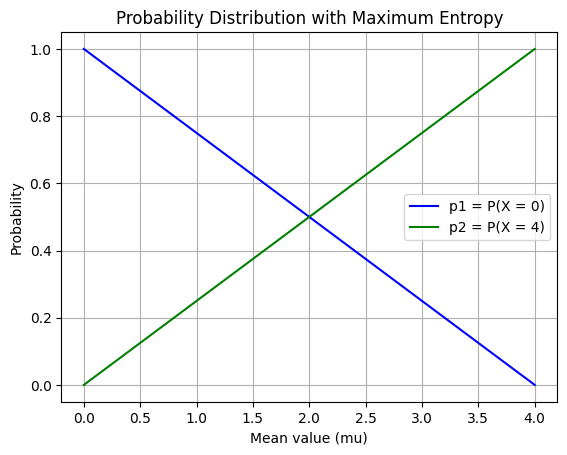

In [8]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate beta given the mean value mu, using the equation of the principle of maximum entropy
def solve_beta(mu, x1, x2):
    def equation(beta):
        return (beta**x1 * x1 + beta**x2 * x2) - mu * (beta**x1 + beta**x2)

    beta_initial_guess = 10.0  # Initial guess for beta
    # take the first element of beta since we expect only one result
    beta_solution = fsolve(equation, beta_initial_guess)[0]
    return beta_solution

# Function to calculate probabilities p1 and p2 using the solved value of beta
def solve_probabilities_with_beta(mu, x1, x2):
    beta = solve_beta(mu, x1, x2)
    p1 = beta**x1 / (beta**x1 + beta**x2)
    p2 = 1 - p1  # Since p1 + p2 = 1
    return p1, p2

# Function to plot the probabilities for different mean values, using the maximum entropy approach
def plot_distributions_with_beta(mu_values, x1, x2):
    p1_values = []
    p2_values = []
    
    for mu in mu_values:
        p1, p2 = solve_probabilities_with_beta(mu, x1, x2)
        p1_values.append(p1)
        p2_values.append(p2)
    
    plt.plot(mu_values, p1_values, label='p1 = P(X = 0)', color='blue')
    plt.plot(mu_values, p2_values, label='p2 = P(X = 4)', color='green')
    plt.xlabel('Mean value (mu)')
    plt.ylabel('Probability')
    plt.title('Probability Distribution with Maximum Entropy')
    plt.legend()
    plt.grid(True)
    plt.show()


# define a range of mean values and the outcomes
mu_values = np.linspace(0, 4, 100)
x1 = 0
x2 = 4

# plot the distributions and calculate beta for each mean value
plot_distributions_with_beta(mu_values, x1, x2)

# Exercise 3 - B
A delivery company provides four different delivery options for packages based on customer needs. Each delivery option has a different cost associated with it, reflecting the speed and resources required. The goal is to analyze the probabilities of selecting each delivery option based on various average cost expectations.
The delivery options are:
- x1 = 0: Standard delivery - cost = 0$
- x2 = 1: Express delivery - cost = 3$
- x3 = 2: Next day delivery - cost = 5$
- x4 = 3: Same day delivery - cost = 10$


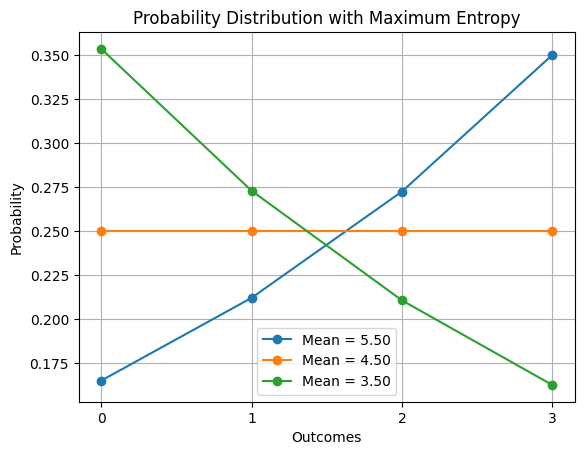

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

outcomes = np.array([0, 1, 2, 3])  # Delivery options
costs = np.array([0, 3, 5, 10])     # Associated costs

# arithmetic mean of costs
arithmetic_mean = np.mean(costs)

# calculate beta given the mean value mu
def solve_beta(mu, costs):
    def equation(beta):
        return np.sum(costs * (beta ** outcomes)) - mu * np.sum(beta ** outcomes)

    beta_initial_guess = 1.0  # Initial guess for beta
    # take the first element of beta since we expect only one result
    beta_solution = fsolve(equation, beta_initial_guess)[0]
    return beta_solution

def solve_probabilities_with_beta(mu, costs):
    beta = solve_beta(mu, costs)
    # compute the probabilities for the value of beta corresponding to the value of mu and to the costs
    probabilities = (beta ** outcomes) / np.sum(beta ** outcomes)
    return probabilities

# I compute the probabilities of the distinct outcomes given different values of mu
def plot_distributions(mu_values, costs):
    for mu in mu_values:
        probabilities = solve_probabilities_with_beta(mu, costs)
        plt.plot(outcomes, probabilities, marker='o', label=f'Mean = {mu:.2f}')

    plt.xlabel('Outcomes')
    plt.ylabel('Probability')
    plt.title('Probability Distribution with Maximum Entropy')
    plt.xticks(outcomes)
    plt.legend()
    plt.grid(True)
    plt.show()

# I create a list with some mean values for plotting
mean_values = [arithmetic_mean + 1, arithmetic_mean, arithmetic_mean -1] 

plot_distributions(mean_values, costs)